# Entregável 3: TurinGucci

In [1068]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset:

1.employee_id: ID único do funcionário;

2.department: departamento do funcionário;

3.region: região de emprego (não ordenada);

4.education: nível educacional do funcionário;

5.gender: gênero do funcionário

6.recruitment_channel: canal de recrutamento para o funcionário;

7.no_ of_ trainings:  número de treinamentos completados em anos passados, sejam em soft skills, technical skills, etc.

8.age: idade do funcionário;

9.previous_ year_ rating: avaliação do funcionário para o ano anterior;

10.length_ of_ service: duração do serviço em anos;

11.awards_ won?: se ganhou algum prêmio em anos anteriores, recebe 1, do contrário 0;

12.avg_ training_ score: pontuação média nas avaliações de treinamento atuais;

13.is_promoted: (Target) recomendado ou não para promoção.

In [1069]:
df = dataframe = pd.read_csv('dataset3.psv',skiprows=1,sep='|')

In [1070]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54807 entries, 0 to 54806
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   65438              54807 non-null  int64  
 1   Sales & Marketing  54807 non-null  object 
 2   region_7           54807 non-null  object 
 3   Master's & above   52398 non-null  object 
 4   f                  54807 non-null  object 
 5   sourcing           54807 non-null  object 
 6   1.0                49961 non-null  float64
 7   35                 54807 non-null  int64  
 8   5.0                50683 non-null  float64
 9   8                  54807 non-null  int64  
 10  0                  54807 non-null  int64  
 11  49.0               47349 non-null  float64
 12  0.1                54807 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.4+ MB


Os títulos das colunas estão pouco intuítivos

In [1071]:
df.rename(columns = {'65438':'employee_id'}, inplace = True)
df.rename(columns = {'Sales & Marketing':'department'}, inplace = True)
df.rename(columns = {'region_7':'region'}, inplace = True)
df.rename(columns = {"Master's & above":'education'}, inplace = True)
df.rename(columns = {"f":'gender'}, inplace = True)
df.rename(columns = {"sourcing":'recruitment_channel'}, inplace = True)
df.rename(columns = {"1.0":'no_ of_ trainings'}, inplace = True)
df.rename(columns = {"35":'age'}, inplace = True)
df.rename(columns = {"5.0":'previous_ year_ rating'}, inplace = True)
df.rename(columns = {"8":'length_ of_ service'}, inplace = True)
df.rename(columns = {"0":'awards_ won?'}, inplace = True)
df.rename(columns = {"49.0":'avg_ training_ score'}, inplace = True)
df.rename(columns = {"0.1":'is_promoted'}, inplace = True)

In [1072]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_ of_ trainings,age,previous_ year_ rating,length_ of_ service,awards_ won?,avg_ training_ score,is_promoted
0,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
1,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
2,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
3,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0
4,58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31,3.0,7,0,85.0,0


## Limpeza de dados

### Lidando com os dados categóricos

Possuímos 5 tipos de dados categóricos

In [1073]:
df.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54807,54807,52398,54807,54807
unique,10,35,3,5,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16839,12343,36669,35010,30446


Podemos observar que há 5 tipos de gênero

In [1074]:
df['gender'].unique()

array(['m', 'f', 'MALE', 'fEMALE', 'eu sou homem hetero homossexual!'],
      dtype=object)

Como male e female são do mesmo tipo que m e f, respectivamente, eles podem ser trocados, assim como a orientação sexual pode ser trocada por seu respectivo gênero.

In [1075]:
df["gender"].replace("male", "m", inplace=True)
df["gender"].replace("female", "f", inplace=True)
df["gender"].replace("MALE", "m", inplace=True)
df["gender"].replace("fEMALE", "f", inplace=True)
df["gender"].replace("eu sou homem hetero homossexual!", "m", inplace=True)

In [1076]:
df['gender'].unique()

array(['m', 'f'], dtype=object)

In [1077]:
df['department'].unique()

array(['Operations', 'Sales & Marketing', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal',
       'quem trouxe quenga'], dtype=object)

Podemos ver que há um valor de variável irregular: 'quem trouxe quenga'

Podemos desconsiderar esse valor:

In [1078]:
df.drop(df[df['department'] == 'quem trouxe quenga'].index, inplace = True)

In [1079]:
df['region'].unique()

array(['region_22', 'region_19', 'region_23', 'region_26', 'region_2',
       'region_20', 'region_34', 'region_1', 'region_7', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18',
       'casa da lu na suecia'], dtype=object)

A categoria 'region' também possui um valor irregular: 'casa da lu na suecia'

In [1080]:
df.drop(df[df['region'] == 'casa da lu na suecia'].index, inplace = True)

In [1081]:
df['education'].unique()

array(["Bachelor's", "Master's & above", nan, 'Below Secondary'],
      dtype=object)

A variável educação possui dados faltantes

In [1082]:
df['education'].isna().sum()

2409

Dos cerca dos 54807 dados iniciais, 2409 possuem dados faltantes

In [1083]:
df.dropna(subset = ['education'] ,inplace = True)

In [1084]:
df['education'].isna().sum()

0

In [1085]:
df['recruitment_channel'].unique()

array(['other', 'sourcing', 'referred'], dtype=object)

A categoria de recrutamento possui valores do tipo 'other'(outros), que é pouco informativa

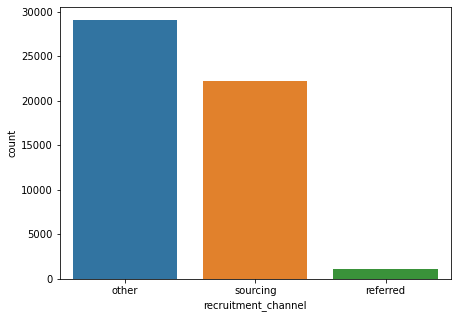

In [1086]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['recruitment_channel'])
plt.show()

Esse valor é maioria no dataset,como a análise desse feature consciste em classifição binária(Ou foi por recrutamento ou não), não será útil na análise.

In [1087]:
df.drop(df[df['recruitment_channel'] == 'other'].index, inplace=True)

## Lidando com os dados numéricos

In [1088]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23326 entries, 1 to 54802
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             23326 non-null  int64  
 1   department              23326 non-null  object 
 2   region                  23326 non-null  object 
 3   education               23326 non-null  object 
 4   gender                  23326 non-null  object 
 5   recruitment_channel     23326 non-null  object 
 6   no_ of_ trainings       21222 non-null  float64
 7   age                     23326 non-null  int64  
 8   previous_ year_ rating  21633 non-null  float64
 9   length_ of_ service     23326 non-null  int64  
 10  awards_ won?            23326 non-null  int64  
 11  avg_ training_ score    20128 non-null  float64
 12  is_promoted             23326 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 2.5+ MB


### Ver se temos dados faltantes

In [1089]:
df.isna().sum()

employee_id                  0
department                   0
region                       0
education                    0
gender                       0
recruitment_channel          0
no_ of_ trainings         2104
age                          0
previous_ year_ rating    1693
length_ of_ service          0
awards_ won?                 0
avg_ training_ score      3198
is_promoted                  0
dtype: int64

Possuímos dados faltantes em 3 features.

Como essas features são numéricas(float), podemos inputar valores(ex: média)

In [1090]:
df['no_ of_ trainings'] = df['no_ of_ trainings'].fillna(df['no_ of_ trainings'].mean())

In [1091]:
df['previous_ year_ rating'] = df['previous_ year_ rating'].fillna(df['previous_ year_ rating'].mean())

In [1092]:
df['avg_ training_ score'] = df['avg_ training_ score'].fillna(df['avg_ training_ score'].mean())

In [1093]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,23326.0,39287.939595,22537.177207,1.0,19896.0,39426.5,58789.50000,78298.0
no_ of_ trainings,23326.0,1.251390,0.581156,1.0,1.0,1.0,1.25139,10.0
age,23326.0,288.828860,5593.098362,-32.0,29.0,33.0,39.00000,123456.0
previous_ year_ rating,23326.0,3.359590,1.205449,1.0,3.0,3.0,4.00000,5.0
length_ of_ service,23326.0,5.901783,4.248972,1.0,3.0,5.0,7.00000,37.0
awards_ won?,23326.0,0.021735,0.145821,0.0,0.0,0.0,0.00000,1.0
avg_ training_ score,23326.0,63.786566,12.489534,41.0,53.0,63.0,72.00000,99.0
is_promoted,23326.0,0.088399,0.283881,0.0,0.0,0.0,0.00000,1.0


Podemos observar que o id do funcionário exerce pouca relevância na análise.
Também é possível observar que a feature 'age'(idade) possui outliers.

In [1094]:
df.drop(columns=['employee_id'], inplace = True)

In [1095]:
df.head()

,department,region,education,gender,recruitment_channel,no_ of_ trainings,age,previous_ year_ rating,length_ of_ service,awards_ won?,avg_ training_ score,is_promoted
1,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
4,Analytics,region_2,Bachelor's,m,sourcing,2.0,31,3.0,7,0,85.0,0
6,Operations,region_34,Master's & above,m,sourcing,1.0,33,3.0,6,0,63.0,0
8,Sales & Marketing,region_1,Master's & above,m,sourcing,1.0,32,5.0,5,0,54.0,0
10,Sales & Marketing,region_7,Bachelor's,f,sourcing,1.0,35,5.0,3,0,50.0,1


<AxesSubplot:ylabel='Density'>

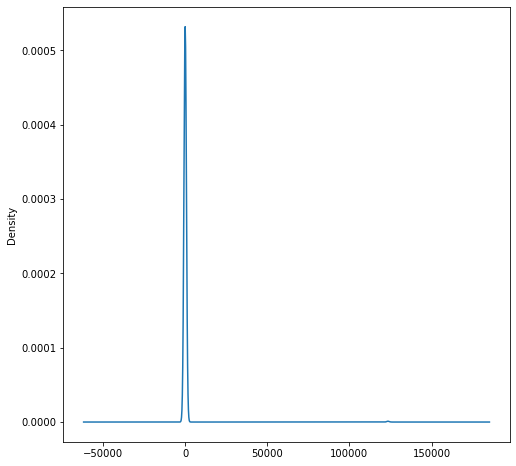

In [1096]:
plt.figure(figsize=(8,8))
df['age'].plot(kind='kde')

É evidente que os outliers distorcem o gráfico, uma vez que valores discrepantes exprimem a curva.

In [1097]:
df = df.query('0<age<110')

<AxesSubplot:ylabel='Density'>

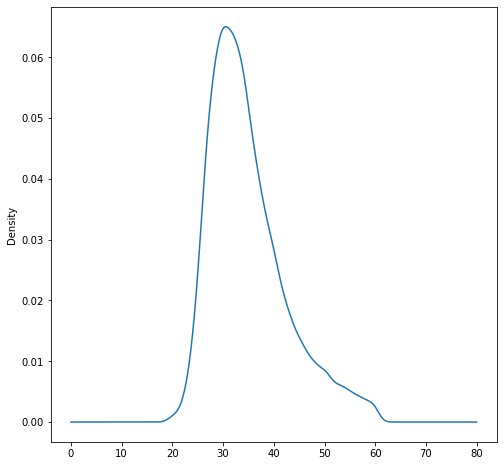

In [1098]:
plt.figure(figsize=(8,8))
df['age'].plot(kind='kde')

Já é possível ter uma percepção mais abrangente da feature idade.

## Análise do conjunto

Vamos observar as features que mais possuem correlação entre si.

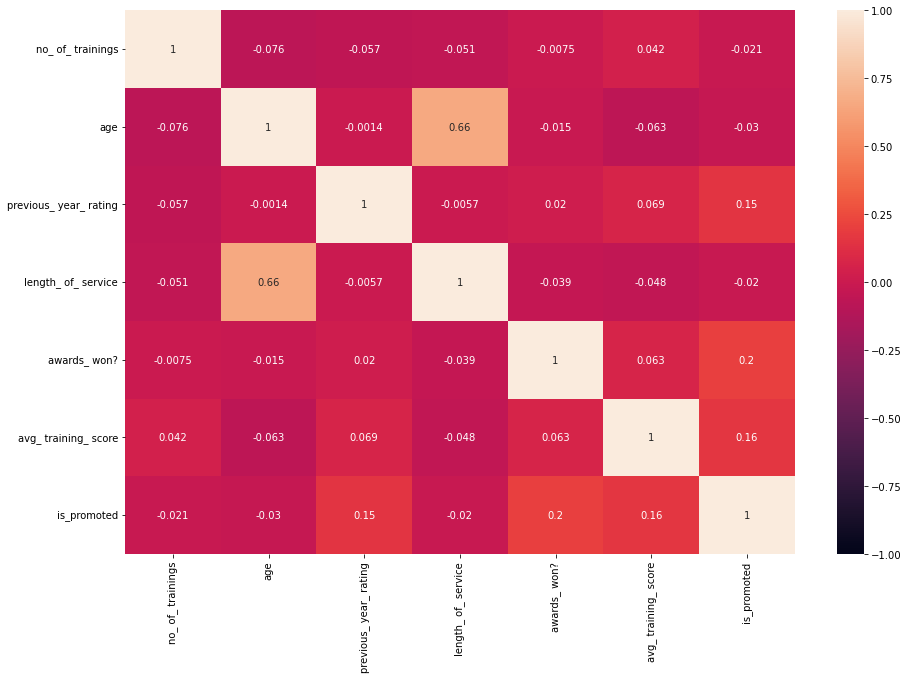

In [1099]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Graças ao heatmap é possível deduzir que a idade e o tempo de serviço tem alta correlação;
Em relação ao target, a feature que mais possui correlação é a feature relacionada à já ter ganhado um prêmio, seguida por pontuações nas avaliações de treinamento, e pela avaliação do funcionário no ano anterior. As features que mais afeta inversamente o target(correlação negativa) são: Idade, Número de treinamentos e tempo de serviço. Conclui-se que os funcionários que tem mais chances de serem promovidos são os mais jovens e mais promissores.

## Modelo de Predição:

### Categorical encoding: One-hot encoding

Transforma as variáveis categóricas em numéricas inteiras

In [1100]:
!pip install sklearn

In [1101]:
from sklearn.preprocessing import OneHotEncoder #dados nominais
from sklearn.preprocessing import OrdinalEncoder #dados ordinais

Usaremos o HotEncoder para as features nominais

In [1102]:
ohe = OneHotEncoder()

In [1103]:
nominal_features = ['department', 'gender', 'recruitment_channel']

In [1104]:
feature_array = ohe.fit_transform(df[nominal_features]).toarray()

In [1105]:
ohe.categories_

[array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
        'R&D', 'Sales & Marketing', 'Technology'], dtype=object),
 array(['f', 'm'], dtype=object),
 array(['referred', 'sourcing'], dtype=object)]

In [1106]:
feature_labels = ohe.categories_

In [1107]:
np.concatenate(feature_labels).ravel()

array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology', 'f', 'm', 'referred',
       'sourcing'], dtype=object)

In [1108]:
feature_labels = np.concatenate(feature_labels).ravel()

In [1109]:
print(feature_labels)

['Analytics' 'Finance' 'HR' 'Legal' 'Operations' 'Procurement' 'R&D'
 'Sales & Marketing' 'Technology' 'f' 'm' 'referred' 'sourcing']


In [1110]:
features = pd.DataFrame(feature_array, columns = feature_labels)

In [1111]:
features.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,f,m,referred,sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [1112]:
df1 = pd.concat([df,features], axis = 1)

In [1113]:
df1.head()

,department,region,education,gender,recruitment_channel,no_ of_ trainings,age,previous_ year_ rating,length_ of_ service,awards_ won?,...,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,f,m,referred,sourcing
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,Analytics,region_2,Bachelor's,m,sourcing,2.0,31.0,3.0,7.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [1114]:
df1.dropna(inplace=True)

In [1115]:
df1.drop(columns= nominal_features, inplace = True)

In [1116]:
df1.head()

,region,education,no_ of_ trainings,age,previous_ year_ rating,length_ of_ service,awards_ won?,avg_ training_ score,is_promoted,Analytics,...,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,f,m,referred,sourcing
1,region_19,Bachelor's,1.0,34.0,3.0,7.0,0.0,50.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,region_2,Bachelor's,2.0,31.0,3.0,7.0,0.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,region_34,Master's & above,1.0,33.0,3.0,6.0,0.0,63.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
8,region_1,Master's & above,1.0,32.0,5.0,5.0,0.0,54.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
10,region_7,Bachelor's,1.0,35.0,5.0,3.0,0.0,50.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Categorical encoding: Ordinal encoding

In [1117]:
ordinal_features = ['region', 'education']

In [1118]:
sorted(df['education'].unique())

["Bachelor's", 'Below Secondary', "Master's & above"]

In [1119]:
ord_education = ['Below Secondary',"Bachelor's", "Master's & above" ]

In [1120]:
sorted(df['region'].unique())

['region_1',
 'region_10',
 'region_11',
 'region_12',
 'region_13',
 'region_14',
 'region_15',
 'region_16',
 'region_17',
 'region_18',
 'region_19',
 'region_2',
 'region_20',
 'region_21',
 'region_22',
 'region_23',
 'region_24',
 'region_25',
 'region_26',
 'region_27',
 'region_28',
 'region_29',
 'region_3',
 'region_30',
 'region_31',
 'region_32',
 'region_33',
 'region_34',
 'region_4',
 'region_5',
 'region_6',
 'region_7',
 'region_8',
 'region_9']

As regiões não estão em ordem

In [1121]:
org_region = {}
stri = 'region_'

for i in df['region'].unique():
   org_region[i] = int(i[len(stri):])

In [1122]:
sort_region = sorted(org_region.items(), key=lambda x:x[1])

In [1123]:
sort_region = dict(sort_region)

In [1124]:
sort_region

{'region_1': 1,
 'region_2': 2,
 'region_3': 3,
 'region_4': 4,
 'region_5': 5,
 'region_6': 6,
 'region_7': 7,
 'region_8': 8,
 'region_9': 9,
 'region_10': 10,
 'region_11': 11,
 'region_12': 12,
 'region_13': 13,
 'region_14': 14,
 'region_15': 15,
 'region_16': 16,
 'region_17': 17,
 'region_18': 18,
 'region_19': 19,
 'region_20': 20,
 'region_21': 21,
 'region_22': 22,
 'region_23': 23,
 'region_24': 24,
 'region_25': 25,
 'region_26': 26,
 'region_27': 27,
 'region_28': 28,
 'region_29': 29,
 'region_30': 30,
 'region_31': 31,
 'region_32': 32,
 'region_33': 33,
 'region_34': 34}

In [1125]:
ord_region = []

for i in sort_region:
    ord_region.append(i)

In [1126]:
enc_edu = OrdinalEncoder(categories = [ord_education])

In [1127]:
df1['education'] = enc_edu.fit_transform(df1[['education']])

In [1128]:
enc_re = OrdinalEncoder(categories = [ord_region])

In [1130]:
df1['region'] = enc_re.fit_transform(df1[['region']])

In [1131]:
df1.head()

,region,education,no_ of_ trainings,age,previous_ year_ rating,length_ of_ service,awards_ won?,avg_ training_ score,is_promoted,Analytics,...,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,f,m,referred,sourcing
1,18.0,1.0,1.0,34.0,3.0,7.0,0.0,50.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,1.0,2.0,31.0,3.0,7.0,0.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,33.0,2.0,1.0,33.0,3.0,6.0,0.0,63.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.0,2.0,1.0,32.0,5.0,5.0,0.0,54.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
10,6.0,1.0,1.0,35.0,5.0,3.0,0.0,50.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Normalização

Vamos transformar os valores da coluna entre 0 e 1(MinMaxScaler)

In [1132]:
df = df1

In [1133]:
from sklearn import preprocessing

In [1134]:
scaler = preprocessing.MinMaxScaler()

In [1136]:
names = df.columns

In [1137]:
d = scaler.fit_transform(df)

In [1139]:
scaled_df = pd.DataFrame(d, columns=names)

In [1151]:
scaled_df.head().T

,0,1,2,3,4
region,0.545455,0.030303,1.000000,0.000000,0.181818
education,0.500000,0.500000,1.000000,1.000000,0.500000
no_ of_ trainings,0.000000,0.125000,0.000000,0.000000,0.000000
age,0.350000,0.275000,0.325000,0.300000,0.375000
previous_ year_ rating,0.500000,0.500000,0.500000,1.000000,1.000000
length_ of_ service,0.181818,0.181818,0.151515,0.121212,0.060606
awards_ won?,0.000000,0.000000,0.000000,0.000000,0.000000
avg_ training_ score,0.155172,0.758621,0.379310,0.224138,0.155172
is_promoted,0.000000,0.000000,0.000000,0.000000,1.000000
Analytics,1.000000,0.000000,0.000000,0.000000,0.000000


In [1152]:
df = scaled_df

### Modelo: KNN

Vamos agora treinar um modelo KNN para prever o target

In [1153]:
from sklearn.neighbors import KNeighborsClassifier

In [1154]:
#Classificador
neigh = KNeighborsClassifier(n_neighbors=10)

In [1155]:
df.describe()

,region,education,no_ of_ trainings,age,previous_ year_ rating,length_ of_ service,awards_ won?,avg_ training_ score,is_promoted,Analytics,...,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,f,m,referred,sourcing
count,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,...,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000,9770.000000
mean,0.396926,0.633316,0.031451,0.370862,0.588450,0.148379,0.020266,0.394405,0.087001,0.096008,...,0.018628,0.211157,0.135926,0.019550,0.296418,0.135517,0.298772,0.701228,0.047799,0.952201
std,0.304345,0.236976,0.071758,0.187832,0.299915,0.129561,0.140916,0.216165,0.281851,0.294618,...,0.135216,0.408150,0.342728,0.138454,0.456701,0.342292,0.457743,0.457743,0.213352,0.213352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.500000,0.000000,0.225000,0.500000,0.060606,0.000000,0.206897,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.363636,0.500000,0.000000,0.325000,0.500000,0.121212,0.000000,0.379310,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.636364,1.000000,0.031424,0.475000,0.750000,0.204545,0.000000,0.551724,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Há 9770 valores, vamos separar em torno de 75% para treino e 25% para teste